<a href="https://colab.research.google.com/github/ziyafasal/Image-recognition/blob/main/Image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day 1

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ziyafasal","key":"109513b55727843af18f0f4618054970"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [6]:
import tensorflow as tf
(X_train,y_train), (X_test,y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape : {X_train.shape}, Test shape : {X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape : (60000, 28, 28), Test shape : (10000, 28, 28)


In [7]:
X_train=X_train/255.0
X_test= X_test/255.0
X_train= X_train.reshape(-1,28,28,1)
X_test= X_test.reshape(-1,28,28,1)
print(f"Train reshaped : {X_train.shape}")

Train reshaped : (60000, 28, 28, 1)


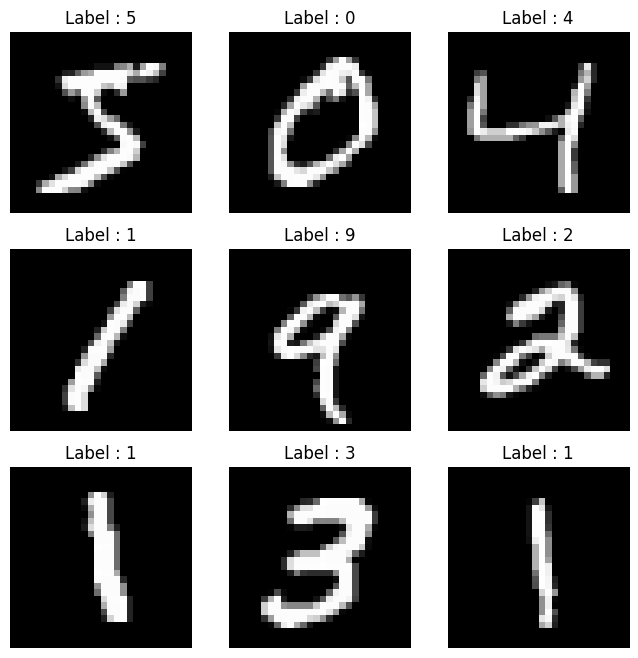

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i].reshape(28,28), cmap='gray')
  plt.title(f"Label : {y_train[i]}")
  plt.axis('off')
plt .show()

In [9]:
(X_train_c10, y_train_c10), (X_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
X_train_c10 = X_train_c10/255.0
X_test_c10 = X_test_c10/255.0
print(f'CIFAR-10 train shape : {X_train_c10.shape}')


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
CIFAR-10 train shape : (50000, 32, 32, 3)


Day 2

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax'),

])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.9002 - loss: 0.3177 - val_accuracy: 0.9813 - val_loss: 0.0603
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.9861 - loss: 0.0438 - val_accuracy: 0.9847 - val_loss: 0.0521
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 86s 33ms/step - accuracy: 0.9906 - loss: 0.0293 - val_accuracy: 0.9891 - val_loss: 0.0372
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9939 - loss: 0.0179 - val_accuracy: 0.9863 - val_loss: 0.0456
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9945 - loss: 0.0165 - val_accuracy: 0.9908 - val_loss: 0.0345


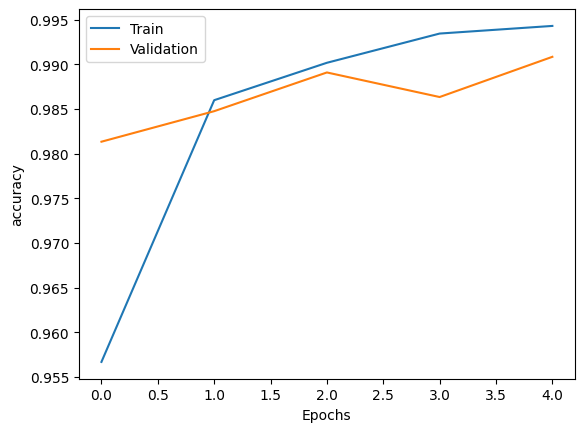

In [12]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],
         label='Validation')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [13]:
test_loss,test_acc= model.evaluate(X_test,y_test)
print(f"Test accuracy : {test_acc:.4f}")
y_pred = model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9884 - loss: 0.0344
Test accuracy : 0.9896
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [14]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax'),

])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


Day 3

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_c10)

In [16]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax'),
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(X_train_c10, y_train_c10,batch_size=32),epochs=10,validation_data=(X_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 74ms/step - accuracy: 0.3463 - loss: 1.7647 - val_accuracy: 0.4744 - val_loss: 1.4332
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.5244 - loss: 1.3280 - val_accuracy: 0.6091 - val_loss: 1.0910
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.5753 - loss: 1.2005 - val_accuracy: 0.6468 - val_loss: 0.9990
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.6070 - loss: 1.1236 - val_accuracy: 0.6216 - val_loss: 1.0999
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.6328 - loss: 1.0527 - val_accuracy: 0.6353 - val_loss: 1.0366
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.6446 - loss: 1.0206 - val_accuracy: 0.6682 - val_loss: 0.9986
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.6529 - loss: 0.9998 - val_accuracy: 0.6955 - val_loss: 0.8825
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.6683 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1000
           1       0.84      0.86      0.85      1000
           2       0.79      0.41      0.54      1000
           3       0.61      0.43      0.50      1000
           4       0.58      0.73      0.64      1000
           5       0.78      0.46      0.58      1000
           6       0.57      0.92      0.70      1000
           7       0.75      0.74      0.75      1000
           8       0.73      0.89      0.80      1000
           9       0.73      0.86      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.72      0.70      0.69     10000
weighted avg       0.72      0.70      0.69     10000



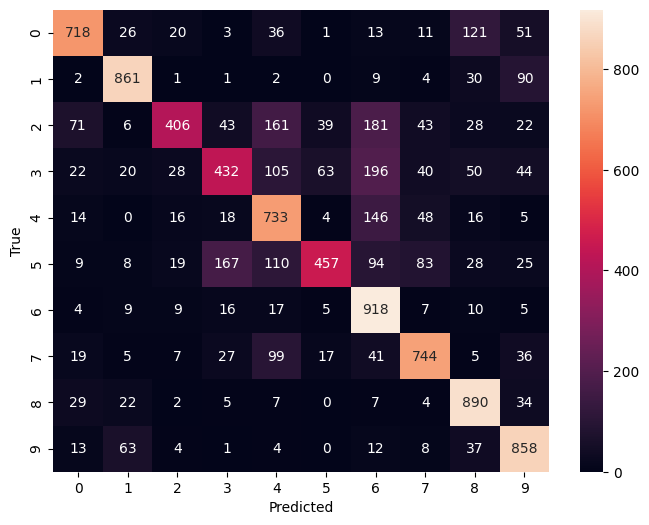

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred_c10 = model.predict(X_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




Day 4

In [18]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 95% 206M/218M [00:00<00:00, 550MB/s] 
100% 218M/218M [00:00<00:00, 590MB/s]


In [19]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = datagen.flow_from_directory('/content/dogs-vs-cats',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='binary',
                                              subset='training')

val_generator = datagen.flow_from_directory('/content/dogs-vs-cats',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='binary',
                                            subset='validation')





Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model = MobileNetV2(weights='imagenet',include_top= False,
                          input_shape=(224,224,3))
base_model.trainable=False

model= Sequential([base_model,GlobalAveragePooling2D(),
                   Dense(128,activation='relu'),
                   Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 409s 2s/step - accuracy: 0.7876 - loss: 0.5333 - val_accuracy: 0.7985 - val_loss: 0.5108
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step - accuracy: 0.7911 - loss: 0.5054 - val_accuracy: 0.7985 - val_loss: 0.5097
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 398s 2s/step - accuracy: 0.8018 - loss: 0.4832 - val_accuracy: 0.7985 - val_loss: 0.5155
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 395s 2s/step - accuracy: 0.8073 - loss: 0.4536 - val_accuracy: 0.7970 - val_loss: 0.5283
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 400s 2s/step - accuracy: 0.8099 - loss: 0.4392 - val_accuracy: 0.7975 - val_loss: 0.5447


In [23]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator,epochs=3,validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1761s 7s/step - accuracy: 0.8020 - loss: 0.4738 - val_accuracy: 0.7985 - val_loss: 0.5386
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1718s 7s/step - accuracy: 0.8044 - loss: 0.4384 - val_accuracy: 0.7980 - val_loss: 0.5355
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1722s 7s/step - accuracy: 0.8038 - loss: 0.4155 - val_accuracy: 0.7965 - val_loss: 0.5372


In [26]:
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model = tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step


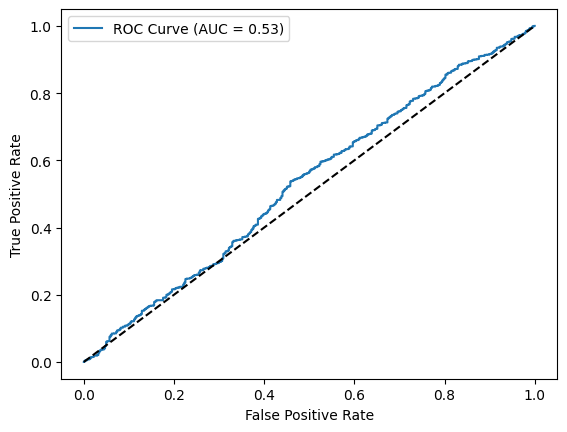

In [28]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = loaded_model.predict(val_generator)
fpr, tpr, _ = roc_curve(val_generator.classes, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Day 5

In [39]:
from google.colab import files
uploaded = files.upload()  # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'download.jpg'  # Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving mydog.jpg to mydog (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted class: Dog


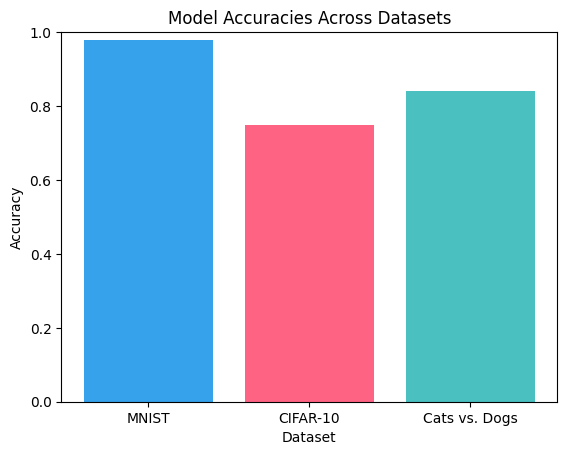

In [33]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.84]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()